Proyek Pertama Machine Learning Terapan: Predictive Analytics

Nama: Muhammad Iqbal Fadlillah

Domisili: Kota Bandung, Jawa Barat

Email: m011x0093@dicoding.org, muhammadmif23@gmail.com

Tahap pertama yaitu mendeklarasikan library yang akan digunakan untuk membaca dataset dalam format .csv, melakukan visualisasi data, dan menghilangkan kolom yang tidak dipakai pada data set.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Kemudian dilanjutkan ke tahap Data Loading upload dimana dataset akan diupload menggunakan path dari google drive. Dataset merupakan data time series nilai Bitcoin Cryptocurrency mulai dari tahun 2019 hingga September 2022. Dataset tersebut diambil dari platform Kaggle dengan link berikut: https://www.kaggle.com/datasets/psycon/bitcoin-usdt-2017202204-historical-dataset 

Setelah diupload dataset tersebut dibaca menggunakan library pandas dan disimpan pada variabel data. Kemudian variabel data dipanggil untuk menampilkan isi Tabel pada dataset tersebut. Dapat dilihat dataset terdiri dari 54259 baris dan 12 kolom. Kolom tersebut terdiri dari Open Time, Open, High, Low, Class, Volume, hingga Ignore.  

In [ ]:
url = '/content/drive/MyDrive/btc-usdt.csv'
data = pd.read_csv(url)
data

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2019-07-30 00:00:00.000000000,9509.07,9535.00,9503.07,9517.75,381.293856,2019-07-30 00:29:59.999000064,3.631211e+06,3492,216.528742,2.062189e+06,0
1,2019-07-30 00:30:00.000000000,9517.03,9539.00,9507.00,9532.58,258.514869,2019-07-30 00:59:59.999000064,2.462134e+06,3133,141.887550,1.351182e+06,0
2,2019-07-30 01:00:00.000000000,9533.59,9534.00,9500.00,9500.25,275.797270,2019-07-30 01:29:59.999000064,2.624322e+06,3583,114.238457,1.087402e+06,0
3,2019-07-30 01:30:00.000000000,9500.25,9514.46,9460.71,9465.25,485.218470,2019-07-30 01:59:59.999000064,4.604004e+06,5330,225.681291,2.141459e+06,0
4,2019-07-30 02:00:00.000000000,9465.25,9488.94,9430.01,9460.42,498.669626,2019-07-30 02:29:59.999000064,4.717269e+06,6197,228.535910,2.162163e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54254,2022-09-04 07:00:00.000000000,19700.96,19733.81,19675.49,19723.50,2936.853930,2022-09-04 07:29:59.999000064,5.786227e+07,83331,1472.239090,2.900747e+07,0
54255,2022-09-04 07:30:00.000000000,19723.21,19728.76,19615.00,19632.40,3269.778610,2022-09-04 07:59:59.999000064,6.437186e+07,79442,1437.167070,2.829950e+07,0
54256,2022-09-04 08:00:00.000000000,19630.95,19680.97,19583.10,19656.41,5140.947610,2022-09-04 08:29:59.999000064,1.009715e+08,125426,2323.893270,4.565058e+07,0
54257,2022-09-04 08:30:00.000000000,19656.41,19759.83,19645.83,19736.20,4231.870540,2022-09-04 08:59:59.999000064,8.345725e+07,107320,2222.858960,4.383608e+07,0


Selanjutnya menghapus kolom yang tidak akan digunakan datanya menggunakan fungsi .drop() dari variabel data. Pada kasus ini kolom yang tidak akan digunakan adalah 'Open Time', 'Ignore', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume'. Dikarenakan predictive analysis yang akan dilakukan pada dataset Bitcoin Cryptocurrency adalah melakukan prediksi pada nilai atau harga 'CLose' dari harga Bitcoin Cryptocurrency. Nilai Close merupakan nilai terakhir dari Bitcoin Cryptocurrency pada hari itu.

In [ ]:
data = data.drop(columns=['Open Time', 'Ignore', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume'])
data

,Open,High,Low,Close,Volume
0,9509.07,9535.00,9503.07,9517.75,381.293856
1,9517.03,9539.00,9507.00,9532.58,258.514869
2,9533.59,9534.00,9500.00,9500.25,275.797270
3,9500.25,9514.46,9460.71,9465.25,485.218470
4,9465.25,9488.94,9430.01,9460.42,498.669626
...,...,...,...,...,...
54254,19700.96,19733.81,19675.49,19723.50,2936.853930
54255,19723.21,19728.76,19615.00,19632.40,3269.778610
54256,19630.95,19680.97,19583.10,19656.41,5140.947610
54257,19656.41,19759.83,19645.83,19736.20,4231.870540


Kemudian masuk ke tahap Exploratory Data Analysis (EDA) untuk mendeskripsikan nilai variabel yang berfungsi untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Pada bagian ini dataset akan dikenali tipe datanya dari setiap kolom. Untuk melakukan EDA deskripsi variabel dapat menggunakan fungsi .info() Dapat dilihat dari kelima kolom yang tersedia semuanya memiliki tipe data float64.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54259 entries, 0 to 54258
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    54259 non-null  float64
 1   High    54259 non-null  float64
 2   Low     54259 non-null  float64
 3   Close   54259 non-null  float64
 4   Volume  54259 non-null  float64
dtypes: float64(5)
memory usage: 2.1 MB


Tahap selanjutnya dari EDA adalah mengetahui deskripsi dataset yang berupa nilai statistik dengan memanggil fungsi .describe() didapatkan hasil seperti tabel di bawah ini. Terdapat nilai mean, standar deviasi, minimal value, max value, median, dan lainnya dari kelima kolom yang ada pada dataset.

In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,54259.000000,54259.000000,54259.000000,54259.000000,54259.000000
mean,27228.157553,27335.992283,27114.865736,27228.342935,1470.116680
std,17992.142776,18066.307378,17914.218258,17992.009675,1592.462848
min,4131.230000,4258.530000,3782.130000,4130.640000,0.000000
25%,9667.980000,9690.420000,9640.010000,9668.230000,622.758337
50%,22855.290000,22942.380000,22764.010000,22853.750000,1004.346480
75%,42517.780000,42655.290000,42387.615000,42517.970000,1714.819507
max,68635.120000,69000.000000,68462.960000,68633.690000,74378.715690


Selanjutnya masih di tahap EDA yaitu mengecek apakah terdapat data yang hilang pada dataset yang digunakan yaitu dengan memanggil fungsi .isnull().sum() seperti pada cell di bawah ini. Dapat dilihat hasil dari kelima kolom tersebut menunjukan angka 0 yang berarti tidak ada data yang hilang/missing pada dataset tersebut.

In [ ]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Kemudian menampilkan bentuk/shape dari dataset yang digunakan dengan memanggil fungsi .shape diperoleh hasil seperti pada cell berikut yang menunjukan terdapat 54259 baris dan 5 kolom. Jumlah kolom berkurang dari yang semula 10 menjadi 5 dikarenakan terdapat beberapa kolom yang tidak akan digunakan sehingga telah di drop dari dataset. 

In [ ]:
data.shape

(54259, 5)

Tahap selanjutnya adalah menangani Outliers, Outliers adalah sampel yang nilainya sangat jauh dari cakupan umum data utama. Outliers adalah hasil pengamatan yang kemunculannya sangat jarang dan berbeda dari data hasil pengamatan lainnya. Sehingga Outliers perlu dihilangkan, pada kasus ini digunakan metode IQR. Untuk menghilangkan Outliers maka diperlukan visualisasi menggunakan boxplot dari setiap sampel data. Boxplot berfungsi untuk menunjukan ukuran lokasi dan penyebaran, serta memberikan informasi tentang simetri dan outliers.

Boxplot pertama adalah nilai dari sampel kolom 'Open' dapat dilihat tidak terdapat nilai Outliers pada sampel 'Open'

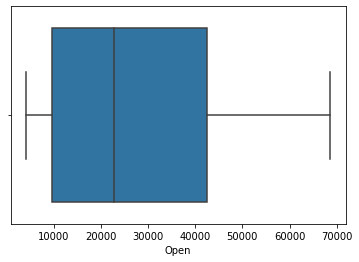

In [ ]:
sns.boxplot(x=data['Open'])

Boxplot kedua adalah nilai dari sampel kolom 'High' dapat dilihat tidak terdapat nilai Outliers pada sampel 'High'

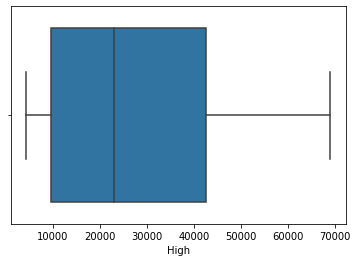

In [ ]:
sns.boxplot(x=data['High'])

Boxplot ketiga adalah nilai dari sampel kolom 'Low' dapat dilihat tidak terdapat nilai Outliers pada sampel 'Low'

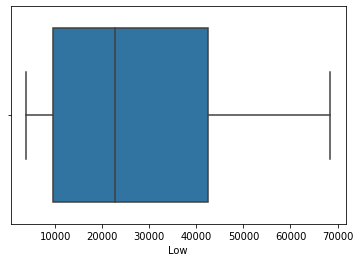

In [ ]:
sns.boxplot(x=data['Low'])

Boxplot keempat adalah nilai dari sampel kolom 'Close' dapat dilihat tidak terdapat nilai Outliers pada sampel 'Close'

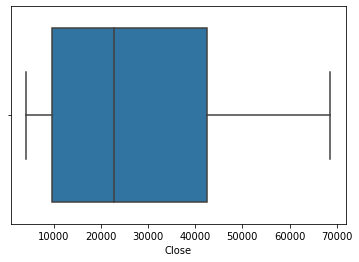

In [ ]:
sns.boxplot(x=data['Close'])

Boxplot terakhir adalah nilai dari sampel kolom Volume' dapat dilihat banyak sampel dari kolom ini yang berada diluar sebaran data sehingga banyak nilai Outliers pada sampel 'Volume' yang perlu dihilangkan.

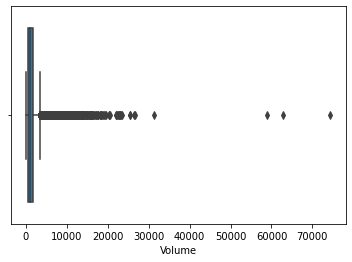

In [ ]:
sns.boxplot(x=data['Volume'])

Langkah selanjutnya adalah menghilangkan Outliers pada dataset yang berada pada sampel 'Volume' dengan menggunakan Metode IQR. Untuk mengimplementasikan metode IQR diperlukan pemahaman terkait kuartil. Kuartil adalah tiga nilai yang membagi distribusi data menjadi empat sebaran. Seperempat dari data berada di bawah kuartil pertama (Q1), setengah dari data berada di bawah kuartil kedua (Q2), dan tiga perempat dari data berada di kuartil ketiga (Q3). Dengan demikian interquartile range atau IQR = Q3 - Q1. Sudah kita ketahui sebelumnya dimana nilai Q1 merupakan 0.25 dari total sebaran data, dan nilai Q3 merupakan 0.75 dari total sebaran data. 

Untuk menghilangkan outliers maka diperlukan perhitungan untuk menentukan nilai max dan nilai min dengan rumus Q1-1.5*IQR untuk nilai MIN dan Q3+1.5*IQR untuk nilai max. Sehingga apabila terdapat data yang nilainya diluar rentang nilai MAX dan MIN akan dianggap sebagai outliers dan dihilangkan.

Kemudian setelah menghilangkan outliers yang terdapat pada dataset dilakukan pemanggilan fungsi .shape untuk mengetahui banyaknya jumlah sampel yang tersisa setelah dilakukan outliers. Dapat dilihat terdapat 19966 baris yang tersisa dari yang semula sebesar 54259. 

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
 
data.shape

(49966, 5)

Dilanjutkan proses analisis data dengan menggunakan teknik EDA Univariate Analysis. Pada tahap ini dilakukan pembagian dataset menjadi data numerikal dan kategorikal, berhubung semua tipe data yang digunakan pada dataset adalah numerikal maka tidak terdapat deklarasi tipe data kategorikal.

In [ ]:
numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume']

Selanjutnya, untuk dataset dengan fitur numerikal dideklarasikan fungsi .hist90 untuk menampilkan plotting data dalam bentuk histogram yang berisikan masing-masing fiturnya menggunakan code pada cell di bawah ini.

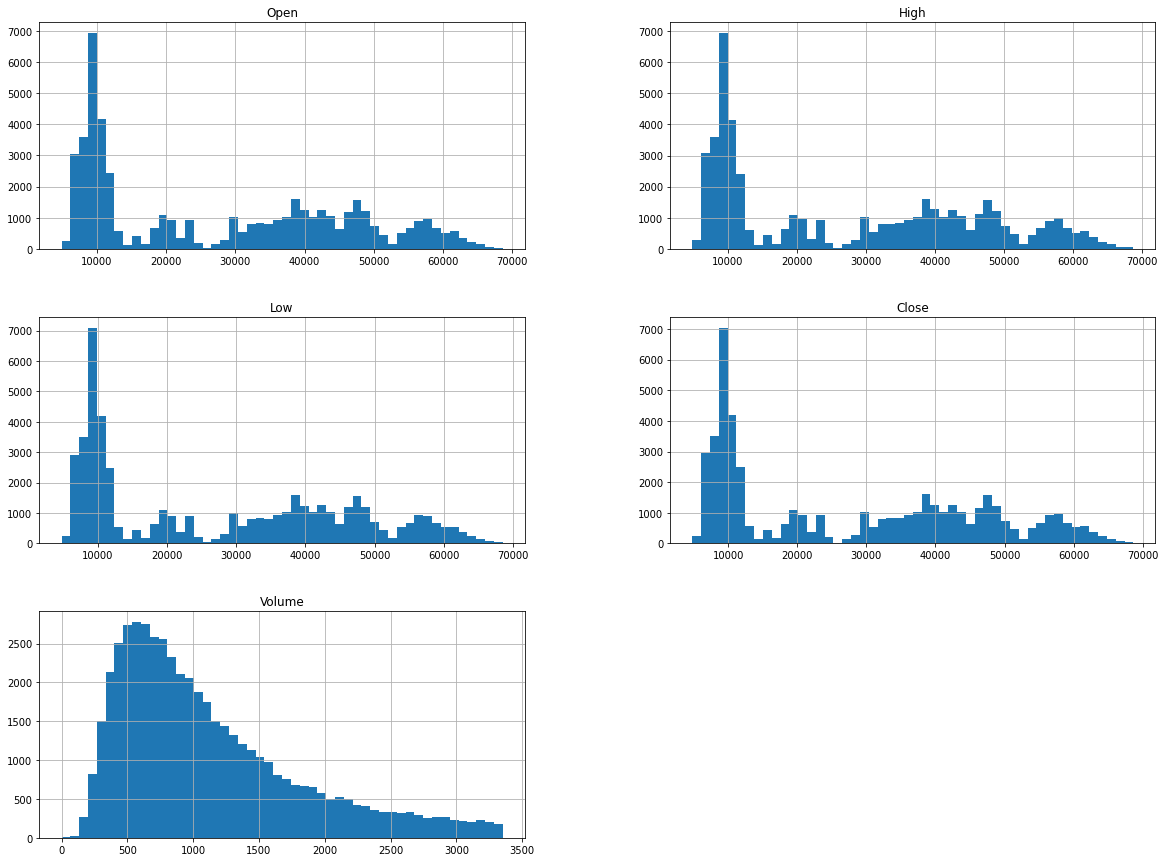

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Berikutnya masih pada tahap EDA tetapi kali ini menggunakan Multivariative Analysis yaitu melakukan analisa mengenai hubungan antara beberapa fitur/variabel yang terdapat pada dataset. Untuk mengamati hubungan dari masing-masing fitur dapat dilakukan plotting grafik menggunakan fungsi .pairplot seperti pada gambar di bawah ini.

Dapat dilihat apabila fitur-fitur tersebut memiliki hubungan satu sama lain maka grafik akan naik ke kanan atas seiring bertambahnya nilai pada sumbu x dan y. Jika fitur-fitur memiliki hubungan yang lemah atau bahkan tidak berhubungan satu sama lain maka grafik yang akan dihasilkan tidak menunjukan sebuah pola dan akan menghasilkan grafik acak.

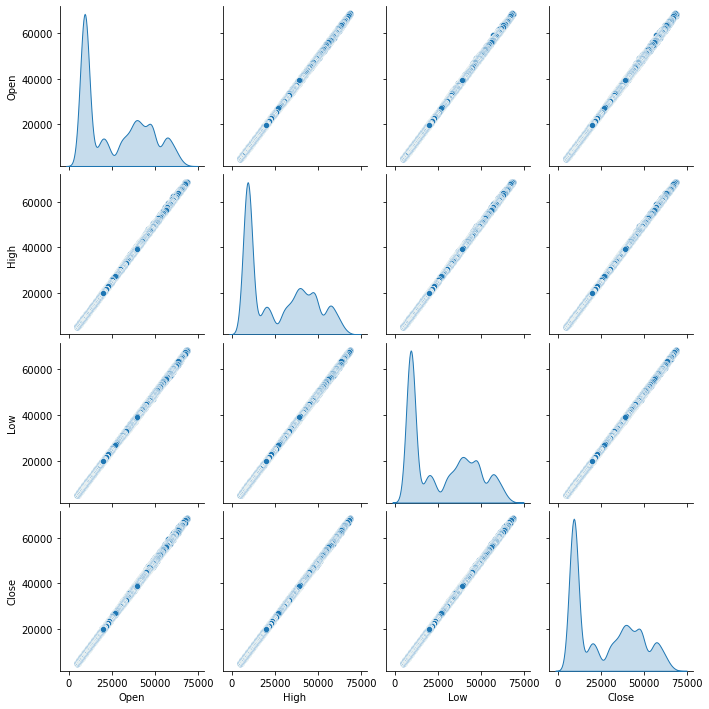

In [ ]:
sns.pairplot(data, diag_kind = 'kde')

Tahap selanjutnya dalam melakukan Multivariative Analysis adalah dengan  Correlation Matrix dengan menggunakan fungsi .corr() untuk menampilkan matriks korelasi sebaran data pada grafik pairplot di atas. Arah korelasi antara dua variabel atau lebih dapat bernilai positif jika nilai kedua variabel cenderung meningkat dan negatif jika nilai salah satu variabel cenderung meningkat ketika nilai variabel lainnya menurun.

Selanjutnya pada Correlation Matrix dapat dilihat jika kolom-kolom pada matriks bernilai 1 atau berwarna merah maka mengindikasikan kedua fitur tersebut sangat berkorelasi satu dengan lainnya. Sebaliknya jika bernilai mendekati 0 atau berwarna biru maka fitur tersebut tidak saling berkolerasi/berkolerasi lemah.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

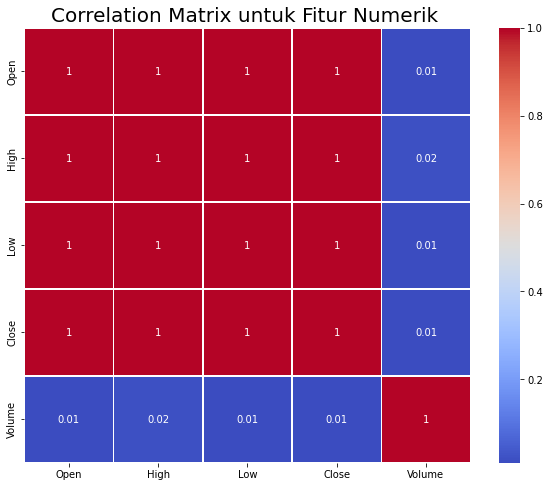

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan hasil Correlation Matrix di atas dapat dilihat bahwa fitur 'Volume' memiliki tingkat kolerasi paling lemah jika dibandingkan dengan fitur lainnya. Sehingga fitur 'Volume' perlu dihapus menggunakan fungsi .drop() dan dataset akan emiliki 4 fitur yang tersisa yaitu 'Open', 'High', 'Low', dan 'Close'.

In [ ]:
data.drop(['Volume'], inplace=True, axis=1)
data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Open,High,Low,Close
0,9509.07,9535.00,9503.07,9517.75
1,9517.03,9539.00,9507.00,9532.58
2,9533.59,9534.00,9500.00,9500.25
3,9500.25,9514.46,9460.71,9465.25
4,9465.25,9488.94,9430.01,9460.42


Setelah melakukan Exploratory Data Analysis dilanjutkan ke tahap Data Preparation. Dimana pada tahap ini data akan disiapkan yang nantinya akan ditraining. Dikarenakan tidak terdapat data dengan fitur kategorikal maka tidak diperlukan penggunaaan fungsi encoding dan juga tidak ada metode Reduksi Dimensi menggunakan PCA.

Pada tahap ini data dibagi menjadi atribut dan label menggunakan fungsi train_test_split dari library sklearn.model_selection kemudian data dibagi menjadi training dan test. Variabel x merupakan atribut yang terdiri semua kolom kecuali 'CLose' dan variabel y merupakan label/target yang terdiri dari kolom 'Close'.

In [ ]:
from sklearn.model_selection import train_test_split
 
x = data.drop(["Close"],axis =1)
y = data["Close"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 110)

Selanjutnya dideklarasikan code untuk mengetahui total sampel yang digunakan dalam training. Total dataset sebanyak 49966, dengan rincian 44969 data latih dan 4997 data tes.

In [ ]:
print(f'Total data of sample in whole dataset: {len(x)}')
print(f'Total data of sample in train dataset: {len(x_train)}')
print(f'Total data of sample in test dataset: {len(x_test)}')

Total data of sample in whole dataset: 49966
Total data of sample in train dataset: 44969
Total data of sample in test dataset: 4997


Kemudian masih pada tahap data preparation, dilakukan standarisasi besaran/nilai dari fitur numerikal 'Open', 'High', dan 'Low' menggunakan function StandardScaler() dari library sklearn.preporcessing sehingga data akan bernilai dari rentang -1 hingga 1. Standarisasi dapat membuat training model lebih cepat dan dapat membantu untuk meningkatkan akurasi model.

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_features =  ['Open', 'High', 'Low']
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
x_train[numerical_features].head()

,Open,High,Low
18615,-0.869647,-0.868160,-0.868550
12391,-1.126406,-1.125282,-1.125505
10223,-1.031683,-1.031475,-1.033914
2563,-0.953836,-0.955288,-0.954090
30845,1.556490,1.550665,1.548198


Selanjutnya masuk ke tahap Model Development, dimana pada tahap ini menggunakan 3 jenis model algoritma seperti yang dicontohkan pada submodul study case pertama : predictive Analysis. Untuk melakukan analisis dari ketiga algoritma,  terlebih dahulu menyiapkan data frame.

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

Dilanjutkan dengan melakukan training menggunakan algoritma KNN dari library sklearn.neighbors menggunakan nilai K = 10 dan metric Euclidean untuk mengukur jarak antara titik. Algoritma KNN menggunakan sistem 'kesamaan fitur' dalam memprediksi nilai dari setiap data yang baru. Sehingga, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(x_train), y_true=y_train)

Dilanjutkan dengan melakukan training menggunakan algoritma Random Forest dari library sklearn.ensemble dan memanggil fungsi RandomForestRegressor dengan beberapa nilai parameter. Parameter tersebut adalah n_estimator: jumlah trees (pohon), max_depth: kedalaman atau panjang pohon dalam membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan random_state: digunakan untuk mengontrol random number generator yang digunakan, n_jobs: jumlah job/pekerjaan yang digunakan secara paralel.Sedangkan n_jobs=-1 artinya semua proses berjalan secara paralel.

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)          

Dan algoritma yang ketiga adalah Boosting Algorithm yang dipanggil dari library sklearn.ensemble dengan fungsi AdaBoostRegressor yang terdiri dari 2 parameter yaitu learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting dan random_state: digunakan untuk mengontrol random number generator yang digunakan.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(x_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train), y_true=y_train)

Selanjutnya untuk melakukan perhitungan pada nilai mae dari model yang telah ditraining maka perlu dilakukan scaling pada data test yang sudah displit sebelumnya. Hal ini dilakukan agar skala antara data trainin dan data test sama.

In [ ]:
x_test.loc[:, numerical_features] = scaler.transform(x_test[numerical_features])

Kemudian masuk ke dalam tahap Evaluasi Model, pada tahap ini model akan diuji menggunakan data test yang sudah atur agar skalanya sama menggunakan metrik Mean Squarred Error (MSE).

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,4.951149,5.955461
RF,1.148839,6.585508
Boosting,3107.891823,3202.451689


Selanjutnya dilakukan plotting dari nilai mae evaluasi model ketiga model. Tetapi karena hasil dari model KKN dan RF yang relatif jauh lebih kecil jika dibandingkan dengan Boosting maka pada grafik tidak terlihat. Untuk menampilkan subplot dapat memanggil fungsi plt.subplots() seperti pada cell di bawah ini.  

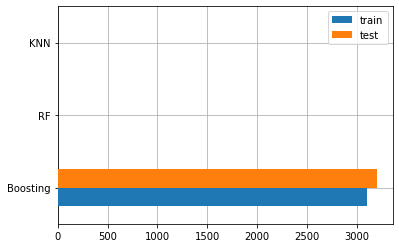

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Masih pada tahap Evaluasi Model, dilakukan prediksi pada model yang telah ditraining menggunakan 3 jenis algoritma. Prediksi dapat dilakukan dengan menggunakan code berikut dan didapatkan hasil seperti pada tabel di bawah. 

In [ ]:
prediksi = x_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
5108,8790.03,8781.0,8784.2,8182.9
39759,60790.88,60619.7,60618.0,59500.6
26419,32540.94,32403.0,32449.4,33044.6
48930,29513.12,29550.4,29555.6,32988.5
10276,8654.96,8648.1,8647.2,8182.9


Setelah menggunakan 3 algoritma yaitu KNN, Boosting, dan Random Forest. Saya mencoba juga algoritma sequential menggunakan tensorflow untuk membuat model predictice analys Bitcoin Cryptocurrency.


Hal pertama yang dilakukan adalah membuat model sequential yang terdiri dari beberapa layer yaitu Normalization, 2 hidden layer (2048 dan 1024), Dropout, dan 1 layer output yang akan menghasilkan label/target nilai 'Close' dari Bitcoin Cryptocurrency.

In [ ]:
import tensorflow as tf
tf.random.set_seed(10)
model = tf.keras.models.Sequential([
      tf.keras.layers.Normalization(),
      tf.keras.layers.Dense(2048, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(1)
])

Selanjutnya adalah mendeklarasikan optimizer yang digunakan, pada kali ini digunakan keras optimizer SGD. Stochastic Gradient Descent (SGD) merupakan metode iteratif untuk mengoptimalkan fungsi objektif dengan sifat kehalusan yang sesuai dalam menangani noise pada model.

Setelah mendeklarasikan optimizer dilanjutkan melakukan compile pada model menggunakan parameter metrik mae, loss mean_squared_logarithmic_error, dan optimizer.

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.000e-4, momentum=0.9)
model.compile(optimizer=optimizer, loss='mean_squared_logarithmic_error',metrics=['mae'])

Dikarenakan menggunakan metrik mae maka dibutuhkan nilai minimum mae yang harus kurang dari 10% dari label/target menggunakan perhitungan seperti berikut. Nilai minimum mae dibutuhkan sebagai acuan bawha model sudah memiliki akurasi yang baik apabila nilai mae pada saat di training sudah berada dibawah 10%.

In [ ]:
minMAE = (data['Close'].max() - data['Close'].min()) * 0.1
minMAE

6381.309000000001

Kemudian dideklarasikan fungsi Callback yang berfungsi untuk memberhentikan proses training apabila nilai mae yang diperoleh pada saat training sudah berada dibawah nilai minMAE yaitu mae < 10% skala data.

In [ ]:
class TestCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('mae') < minMAE):
            print("\nmae < 10%!") 
            self.model.stop_training = True 
callbacks = TestCallback()

Selanjutnya untuk mendapatkan informasi mengenai arsitektur model yang telah dibuat dapat memanggil fungsi .summary(). dari model diperoleh total 2.107.400 parameter dan 2.107.393 yang dilatih.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense (Dense)               (None, 2048)              8192      
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                        

Selanjutnya melatih model Sequential yang sudah dibuat dengan memanggil fungsi  .fit dari model yang berisikan parameter atribut train dan label/target train yang sudah displit sebelumnya. Kemudian model dilatih dengan epochs sebanyak 1000. Tetapi dikarenakan terdapat deklarasi parameter fungsi callbacks yang sudah dibuat sebelumnya model dapat berhenti jika sudah mencapai ketentuan yang telah diterapkan pada fungsi callbacks.

In [ ]:
history = model.fit(x_train, y_train, epochs=1000, verbose=1, callbacks = [callbacks])

Epoch 1/1000
1406/1406 [==============================] - 35s 25ms/step - loss: 39.4566 - mae: 27375.1719
Epoch 2/1000
1406/1406 [==============================] - 33s 23ms/step - loss: 20.1551 - mae: 27175.3145
Epoch 3/1000
1406/1406 [==============================] - 34s 24ms/step - loss: 14.8953 - mae: 26945.7715
Epoch 4/1000
1406/1406 [==============================] - 33s 23ms/step - loss: 12.0261 - mae: 26705.9316
Epoch 5/1000
1406/1406 [==============================] - 33s 23ms/step - loss: 10.1430 - mae: 26460.9492
Epoch 6/1000
1406/1406 [==============================] - 34s 24ms/step - loss: 8.7955 - mae: 26215.2656
Epoch 7/1000
1406/1406 [==============================] - 33s 23ms/step - loss: 7.7662 - mae: 25969.5000
Epoch 8/1000
1406/1406 [==============================] - 33s 23ms/step - loss: 6.9548 - mae: 25725.0293
Epoch 9/1000
1406/1406 [==============================] - 33s 23ms/step - loss: 6.2938 - mae: 25482.4141
Epoch 10/1000
1406/1406 [=========================

Tahap terakhir adalah melakukan plotting dari hasil model sequential yang telah ditraining berdasarkan nilai mae dan loss yang dihasilkan selama proses training. Hasil yang diperoleh sudah baik dikarenakan nilai loss yang sangat kecil dan nilai mae sudah berada dibawah nilai minMAE yang berarti nilai mae < 10% skala data.

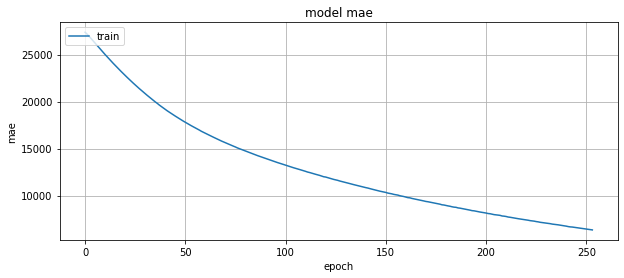

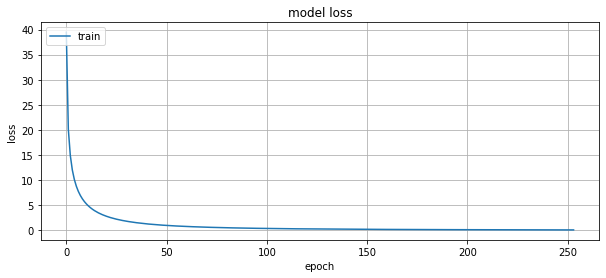

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()